In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(parallel))
suppressMessages(library(Seurat))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(ggsci))
suppressMessages(library(pheatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(LSD))
suppressMessages(library(readxl))
suppressMessages(library(ggrepel))
suppressMessages(library(harmony))
suppressMessages(library(scrattch.hicat))
library(Seurat)

In [2]:
marmoset_meta=read.csv('/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3species_compare_240130/marmoset_meta_0321_renew.csv')
mouse_meta=read.csv('/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3species_compare_240130/mouse_meta.csv')
macaque_meta=read.csv('/home/liuyx/liuyuxuan/spa_seurat/cla/speciesCompare/3species_compare_240130/macaque_meta.csv')



In [3]:
macaque_meta$sample=macaque_meta$donor2
unique(marmoset_meta$sample)
unique(mouse_meta$sample)
unique(macaque_meta$sample)

[1] "MT23R-001" "MT30-008"  "MT29-043"  "MT29-051"

[1] "MS-cla-001"    "MS060-cla001"  "MS060-cla 001"

[1] "MQ286" "MQ279" "MQ277" "MQ439"

In [4]:


all_n=unique(marmoset_meta$Cluster)
ex_n=all_n[grep('GLUT',all_n)]
in_n=c(all_n[grep('GABA',all_n)],all_n[grep('DRD',all_n)])
non_n=setdiff(all_n,c(ex_n,in_n))
marmoset_meta$Subgroup='test'
marmoset_meta[marmoset_meta$Cluster %in% ex_n,]$Subgroup='GLUT'
marmoset_meta[marmoset_meta$Cluster %in% in_n,]$Subgroup='GABA'
marmoset_meta[marmoset_meta$Cluster %in% non_n,]$Subgroup='No-Neuron'


#!!!inhibit慎重

all_n=unique(macaque_meta$Cluster)
ex_n=all_n[grep('GLUT',all_n)]
in_n=c(all_n[grep('GABA',all_n)],all_n[grep('DRD',all_n)])
non_n=setdiff(all_n,c(ex_n,in_n))
macaque_meta$Subgroup='test'
macaque_meta[macaque_meta$Cluster %in% ex_n,]$Subgroup='GLUT'
macaque_meta[macaque_meta$Cluster %in% in_n,]$Subgroup='GABA'
macaque_meta[macaque_meta$Cluster %in% non_n,]$Subgroup='No-Neuron'


#!!!inhibit慎重


all_n=unique(mouse_meta$Cluster)
ex_n=all_n[grep('GLUT',all_n)]
in_n=c(all_n[grep('GABA',all_n)])
non_n=setdiff(all_n,c(ex_n,in_n))
mouse_meta$Subgroup='test'
mouse_meta[mouse_meta$Cluster %in% ex_n,]$Subgroup='GLUT'
mouse_meta[mouse_meta$Cluster %in% in_n,]$Subgroup='GABA'
mouse_meta[mouse_meta$Cluster %in% non_n,]$Subgroup='No-Neuron'




In [5]:
meta_mouse=mouse_meta
#meta_mouse$Subgroup=meta_mouse$SuperCluster

meta_macaque=macaque_meta
#meta_macaque$Subgroup=meta_macaque$SuperCluster

meta_marmoset=marmoset_meta
#meta_marmoset$Subgroup=meta_marmoset$SuperCluster

unique(meta_mouse$Subgroup)
unique(meta_macaque$Subgroup)
unique(meta_marmoset$Subgroup)

[1] "GLUT"      "GABA"      "No-Neuron"

[1] "GLUT"      "GABA"      "No-Neuron"

[1] "GLUT"      "GABA"      "No-Neuron"

In [6]:
meta_mouse$num=1
mouse_sum=meta_mouse %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
mouse_sum$all=sum(mouse_sum$part_num)
mouse_sum$ratio=mouse_sum$part_num/mouse_sum$all*100

mouse_sum_all=data.frame()
for(i in unique(mouse_meta$sample)){
    meta_mouse_sub=meta_mouse[meta_mouse$sample %in% i,]
    meta_mouse_sub$num=1
    mouse_sum=meta_mouse_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    mouse_sum$all=sum(mouse_sum$part_num)
    mouse_sum$ratio=mouse_sum$part_num/mouse_sum$all*100
    mouse_sum$donor=paste0('mouse_',i)
    mouse_sum_all=rbind(mouse_sum_all,mouse_sum)
}


macaque_sum_all=data.frame()
for(i in unique(macaque_meta$sample)){
    meta_macaque_sub=meta_macaque[meta_macaque$sample %in% i,]
    meta_macaque_sub$num=1
    macaque_sum=meta_macaque_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    macaque_sum$all=sum(macaque_sum$part_num)
    macaque_sum$ratio=macaque_sum$part_num/macaque_sum$all*100
    macaque_sum$donor=paste0('macaque_',i)
    macaque_sum_all=rbind(macaque_sum_all,macaque_sum)
}

marmoset_sum_all=data.frame()
for(i in unique(marmoset_meta$sample)){
    meta_marmoset_sub=meta_marmoset[meta_marmoset$sample %in% i,]
    meta_marmoset_sub$num=1
    marmoset_sum=meta_marmoset_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    marmoset_sum$all=sum(marmoset_sum$part_num)
    marmoset_sum$ratio=marmoset_sum$part_num/marmoset_sum$all*100
    marmoset_sum$donor=paste0('marmoset_',i)
    marmoset_sum_all=rbind(marmoset_sum_all,marmoset_sum)
}

marmoset_sum_all$species='marmoset'
mouse_sum_all$species='mouse'
macaque_sum_all$species='macaque'
sum_all=rbind(marmoset_sum_all,mouse_sum_all,macaque_sum_all)
sum_all

Subgroup,part_num,all,ratio,donor,species
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GABA,1767,13838,12.769186,marmoset_MT23R-001,marmoset
GLUT,9660,13838,69.807776,marmoset_MT23R-001,marmoset
No-Neuron,2411,13838,17.423038,marmoset_MT23R-001,marmoset
GABA,7753,48628,15.943489,marmoset_MT30-008,marmoset
GLUT,36226,48628,74.496175,marmoset_MT30-008,marmoset
No-Neuron,4649,48628,9.560336,marmoset_MT30-008,marmoset
GABA,6601,33418,19.752828,marmoset_MT29-043,marmoset
GLUT,22744,33418,68.059130,marmoset_MT29-043,marmoset
No-Neuron,4073,33418,12.188042,marmoset_MT29-043,marmoset


In [7]:
library(ggpubr)
library(ggprism)
library(dplyr)
library(rstatix)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



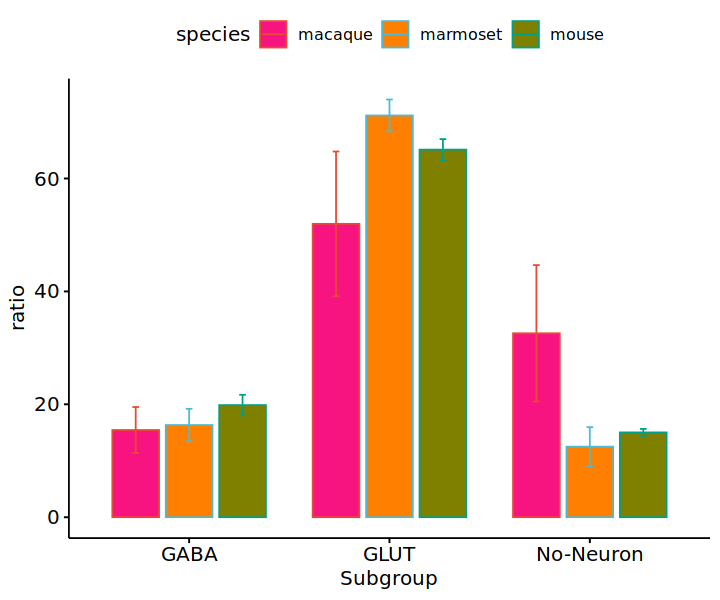

In [8]:
options(repr.plot.width=6, repr.plot.height=5)


test=ggbarplot(sum_all, x = "Subgroup", y = "ratio", 
          add = c("mean_sd"),
          color = "species",fill = "species", palette = "npg",
position = position_dodge(0.8))+  scale_fill_prism(palette = "candy_bright")#使用ggprism包修改颜色
test

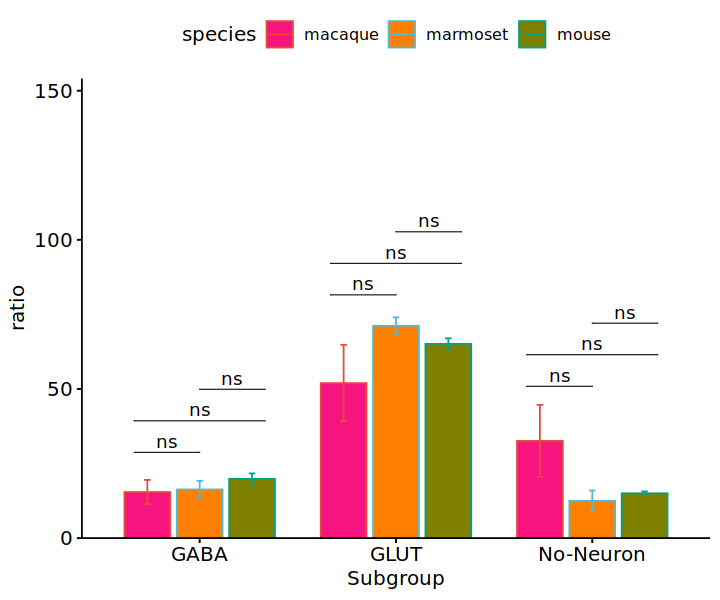

In [9]:
stat.test <- sum_all %>% group_by(Subgroup) %>%
  t_test(ratio ~ species) %>%
  #adjust_pvalue()%>% 
  add_significance("p.adj")
stat.test <- stat.test %>% 
  add_xy_position(x='Subgroup',dodge = 1)
  #add_y_position()
gp1=test + stat_pvalue_manual(
  stat.test,  label = "p.adj.signif", tip.length = 0
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, .5)))

gp1

In [11]:
typeeee='ALL'
write.csv(sum_all,paste0('/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/species_compare_df/',typeeee,'_summary.csv'))


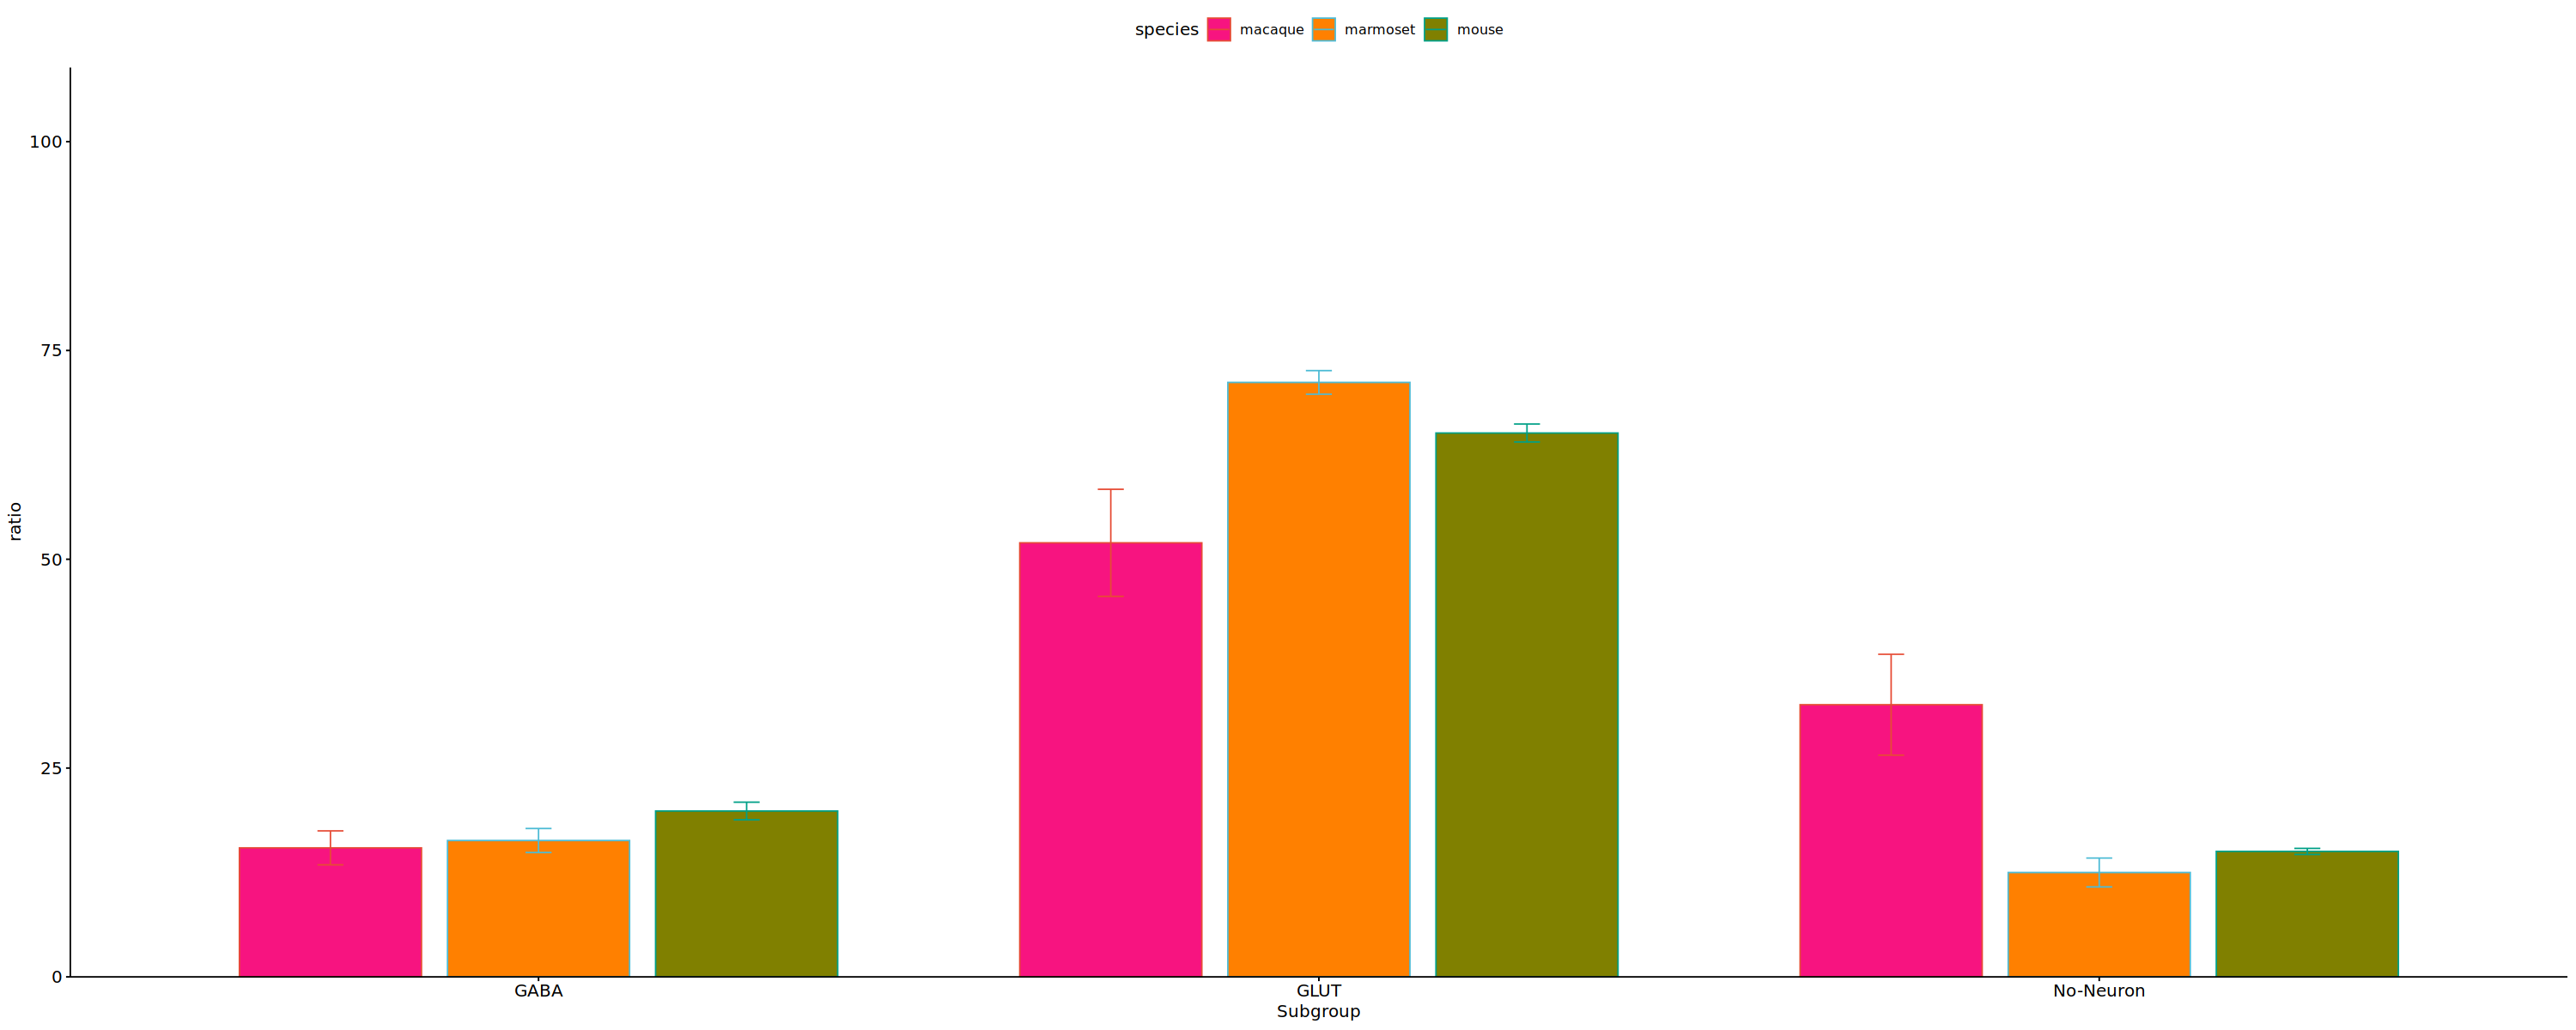

In [24]:
options(repr.plot.width=25, repr.plot.height=10)
test + stat_pvalue_manual(
  stat.test[stat.test$p.adj.signif %in% c('**','***'),],  label = "p.adj.signif", tip.length = 0
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, .5)))



In [12]:
meta_mouse=mouse_meta[mouse_meta$Subgroup=='GLUT',]
meta_mouse$Subgroup=meta_mouse$SuperCluster

meta_macaque=macaque_meta[macaque_meta$Subgroup=='GLUT',]
meta_macaque$Subgroup=meta_macaque$SuperCluster

meta_marmoset= marmoset_meta[marmoset_meta$Subgroup=='GLUT',]
meta_marmoset$Subgroup=meta_marmoset$SuperCluster

unique(meta_mouse$Subgroup)
unique(meta_macaque$Subgroup)
unique(meta_marmoset$Subgroup)

[1] "GLUT_VENO"  "GLUT_GNB4+" "GLUT_GNB4-"

[1] "GLUT_GNB4-" "GLUT_GNB4+" "GLUT_VENO"

[1] "GLUT_GNB4+" "GLUT_VENO"  "GLUT_GNB4-"

In [13]:
meta_mouse$num=1
mouse_sum=meta_mouse %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
mouse_sum$all=sum(mouse_sum$part_num)
mouse_sum$ratio=mouse_sum$part_num/mouse_sum$all*100

mouse_sum_all=data.frame()
for(i in unique(mouse_meta$sample)){
    meta_mouse_sub=meta_mouse[meta_mouse$sample %in% i,]
    meta_mouse_sub$num=1
    mouse_sum=meta_mouse_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    mouse_sum$all=sum(mouse_sum$part_num)
    mouse_sum$ratio=mouse_sum$part_num/mouse_sum$all*100
    mouse_sum$donor=paste0('mouse_',i)
    mouse_sum_all=rbind(mouse_sum_all,mouse_sum)
}


macaque_sum_all=data.frame()
for(i in unique(macaque_meta$sample)){
    meta_macaque_sub=meta_macaque[meta_macaque$sample %in% i,]
    meta_macaque_sub$num=1
    macaque_sum=meta_macaque_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    macaque_sum$all=sum(macaque_sum$part_num)
    macaque_sum$ratio=macaque_sum$part_num/macaque_sum$all*100
    macaque_sum$donor=paste0('macaque_',i)
    macaque_sum_all=rbind(macaque_sum_all,macaque_sum)
}

marmoset_sum_all=data.frame()
for(i in unique(marmoset_meta$sample)){
    meta_marmoset_sub=meta_marmoset[meta_marmoset$sample %in% i,]
    meta_marmoset_sub$num=1
    marmoset_sum=meta_marmoset_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    marmoset_sum$all=sum(marmoset_sum$part_num)
    marmoset_sum$ratio=marmoset_sum$part_num/marmoset_sum$all*100
    marmoset_sum$donor=paste0('marmoset_',i)
    marmoset_sum_all=rbind(marmoset_sum_all,marmoset_sum)
}

marmoset_sum_all$species='marmoset'
mouse_sum_all$species='mouse'
macaque_sum_all$species='macaque'
sum_all=rbind(marmoset_sum_all,mouse_sum_all,macaque_sum_all)
sum_all

Subgroup,part_num,all,ratio,donor,species
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GLUT_GNB4-,2917,9660,30.196687,marmoset_MT23R-001,marmoset
GLUT_GNB4+,5300,9660,54.865424,marmoset_MT23R-001,marmoset
GLUT_VENO,1443,9660,14.937888,marmoset_MT23R-001,marmoset
GLUT_GNB4-,11591,36226,31.996356,marmoset_MT30-008,marmoset
GLUT_GNB4+,18394,36226,50.775686,marmoset_MT30-008,marmoset
GLUT_VENO,6241,36226,17.227958,marmoset_MT30-008,marmoset
GLUT_GNB4-,4538,22744,19.952515,marmoset_MT29-043,marmoset
GLUT_GNB4+,15818,22744,69.548013,marmoset_MT29-043,marmoset
GLUT_VENO,2388,22744,10.499472,marmoset_MT29-043,marmoset


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



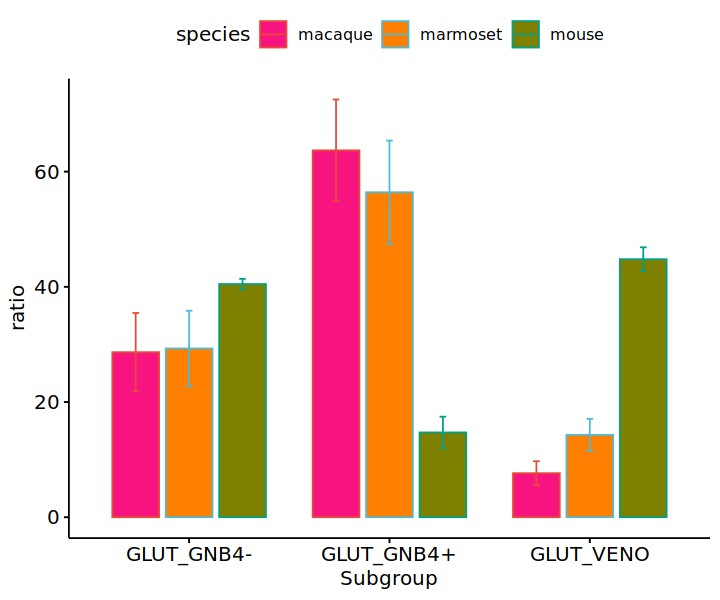

In [14]:
options(repr.plot.width=6, repr.plot.height=5)


test=ggbarplot(sum_all, x = "Subgroup", y = "ratio", 
          add = c("mean_sd"),
          color = "species",fill = "species", palette = "npg",
position = position_dodge(0.8))+  scale_fill_prism(palette = "candy_bright")#使用ggprism包修改颜色
test

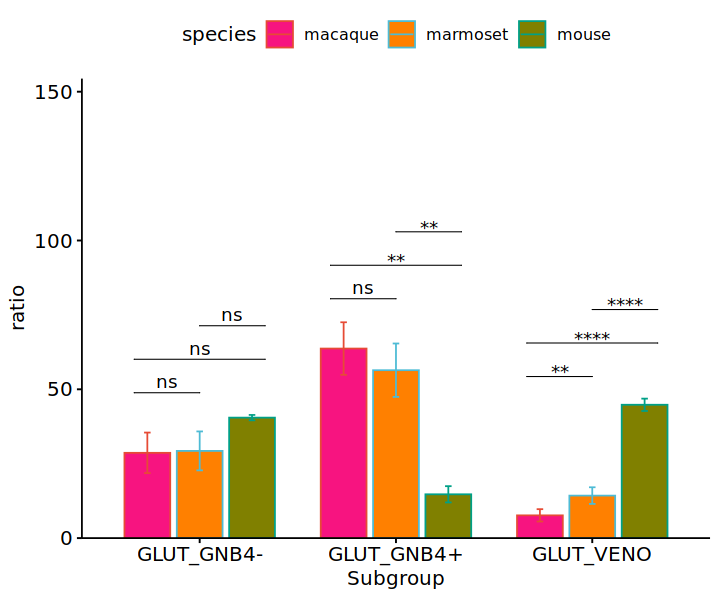

In [15]:
stat.test <- sum_all %>% group_by(Subgroup) %>%
  t_test(ratio ~ species) %>%
  #adjust_pvalue()%>% 
  add_significance("p.adj")
stat.test <- stat.test %>% 
  add_xy_position(x='Subgroup',dodge = 1)
  #add_y_position()
gp2=test + stat_pvalue_manual(
  stat.test,  label = "p.adj.signif", tip.length = 0
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, .5)))

gp2

In [16]:
sum_all %>% group_by(Subgroup,species) %>% summarise(ratio_m=mean(ratio))

`summarise()` has grouped output by 'Subgroup'. You can override using the
`.groups` argument.


Subgroup,species,ratio_m
<chr>,<chr>,<dbl>
GLUT_GNB4-,macaque,28.656023
GLUT_GNB4-,marmoset,29.300596
GLUT_GNB4-,mouse,40.486047
GLUT_GNB4+,macaque,63.697175
GLUT_GNB4+,marmoset,56.418864
GLUT_GNB4+,mouse,14.719358
GLUT_VENO,macaque,7.646803
GLUT_VENO,marmoset,14.280541
GLUT_VENO,mouse,44.794595


In [17]:
typeeee='GLUT'
write.csv(sum_all,paste0('/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/species_compare_df/',typeeee,'_summary.csv'))


In [18]:
meta_mouse=mouse_meta[mouse_meta$Subgroup=='GABA',]
meta_mouse$Subgroup=meta_mouse$SuperCluster

meta_macaque=macaque_meta[macaque_meta$Subgroup=='GABA',]
meta_macaque$Subgroup=meta_macaque$SuperCluster

meta_marmoset= marmoset_meta[marmoset_meta$Subgroup=='GABA',]
meta_marmoset$Subgroup=meta_marmoset$SuperCluster

unique(meta_mouse$Subgroup)
unique(meta_macaque$Subgroup)
unique(meta_marmoset$Subgroup)

[1] "GABA_PVALB"      "GABA_LAMP5"      "GABA_SST"        "GABA_VIP"       
[5] "GABA_CHC"        "GABA_LAMP5_LHX6" "GABA_RELN"       "GABA_DRD2"

[1] "GABA_PVALB"      "GABA_SST"        "GABA_LAMP5"      "GABA_LAMP5_LHX6"
[5] "GABA_VIP"        "GABA_RELN"       "GABA_CHC"        "GABA_DRD2"

[1] "GABA_PVALB"      "GABA_SST"        "GABA_LAMP5_LHX6" "GABA_VIP"       
[5] "GABA_RELN"       "GABA_LAMP5"      "GABA_CHC"        "GABA_DRD2"

In [19]:
meta_mouse$num=1
mouse_sum=meta_mouse %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
mouse_sum$all=sum(mouse_sum$part_num)
mouse_sum$ratio=mouse_sum$part_num/mouse_sum$all*100

mouse_sum_all=data.frame()
for(i in unique(mouse_meta$sample)){
    meta_mouse_sub=meta_mouse[meta_mouse$sample %in% i,]
    meta_mouse_sub$num=1
    mouse_sum=meta_mouse_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    mouse_sum$all=sum(mouse_sum$part_num)
    mouse_sum$ratio=mouse_sum$part_num/mouse_sum$all*100
    mouse_sum$donor=paste0('mouse_',i)
    mouse_sum_all=rbind(mouse_sum_all,mouse_sum)
}


macaque_sum_all=data.frame()
for(i in unique(macaque_meta$sample)){
    meta_macaque_sub=meta_macaque[meta_macaque$sample %in% i,]
    meta_macaque_sub$num=1
    macaque_sum=meta_macaque_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    macaque_sum$all=sum(macaque_sum$part_num)
    macaque_sum$ratio=macaque_sum$part_num/macaque_sum$all*100
    macaque_sum$donor=paste0('macaque_',i)
    macaque_sum_all=rbind(macaque_sum_all,macaque_sum)
}

marmoset_sum_all=data.frame()
for(i in unique(marmoset_meta$sample)){
    meta_marmoset_sub=meta_marmoset[meta_marmoset$sample %in% i,]
    meta_marmoset_sub$num=1
    marmoset_sum=meta_marmoset_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    marmoset_sum$all=sum(marmoset_sum$part_num)
    marmoset_sum$ratio=marmoset_sum$part_num/marmoset_sum$all*100
    marmoset_sum$donor=paste0('marmoset_',i)
    marmoset_sum_all=rbind(marmoset_sum_all,marmoset_sum)
}

marmoset_sum_all$species='marmoset'
mouse_sum_all$species='mouse'
macaque_sum_all$species='macaque'
sum_all=rbind(marmoset_sum_all,mouse_sum_all,macaque_sum_all)
sum_all

Subgroup,part_num,all,ratio,donor,species
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GABA_CHC,26,1767,1.471420,marmoset_MT23R-001,marmoset
GABA_DRD2,526,1767,29.767968,marmoset_MT23R-001,marmoset
GABA_LAMP5,75,1767,4.244482,marmoset_MT23R-001,marmoset
GABA_LAMP5_LHX6,104,1767,5.885682,marmoset_MT23R-001,marmoset
GABA_PVALB,557,1767,31.522354,marmoset_MT23R-001,marmoset
GABA_RELN,100,1767,5.659310,marmoset_MT23R-001,marmoset
GABA_SST,269,1767,15.223543,marmoset_MT23R-001,marmoset
GABA_VIP,110,1767,6.225241,marmoset_MT23R-001,marmoset
GABA_CHC,162,7753,2.089514,marmoset_MT30-008,marmoset


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



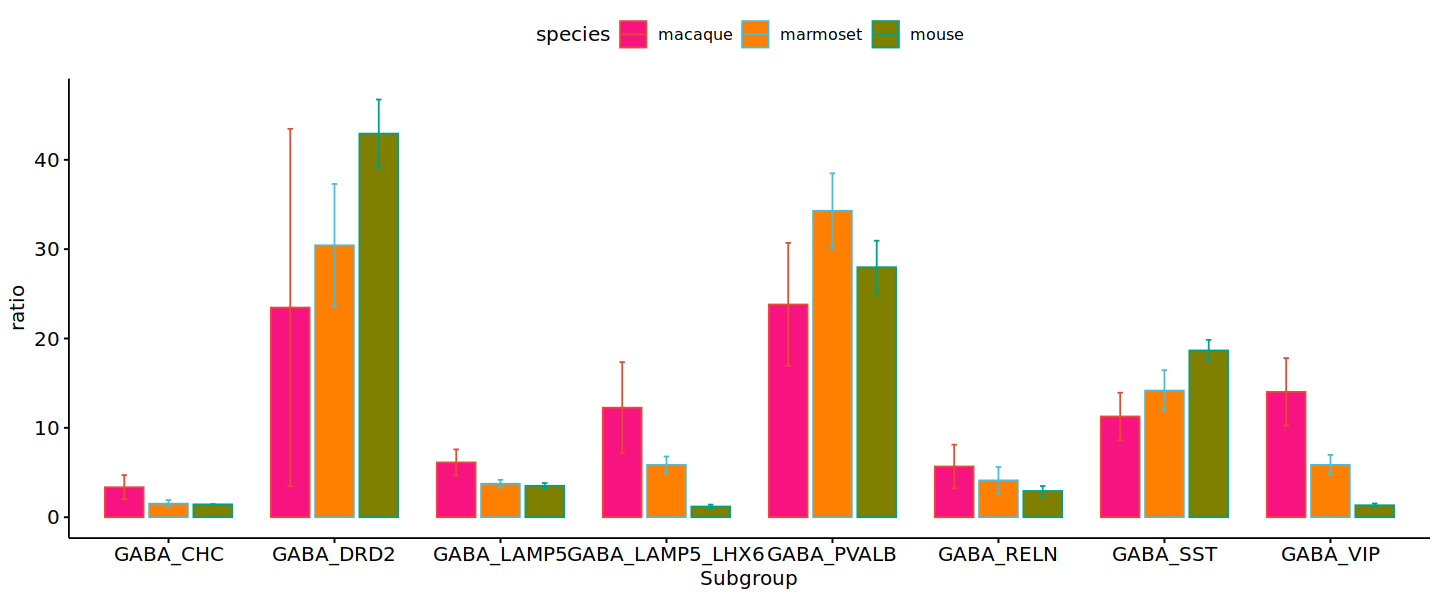

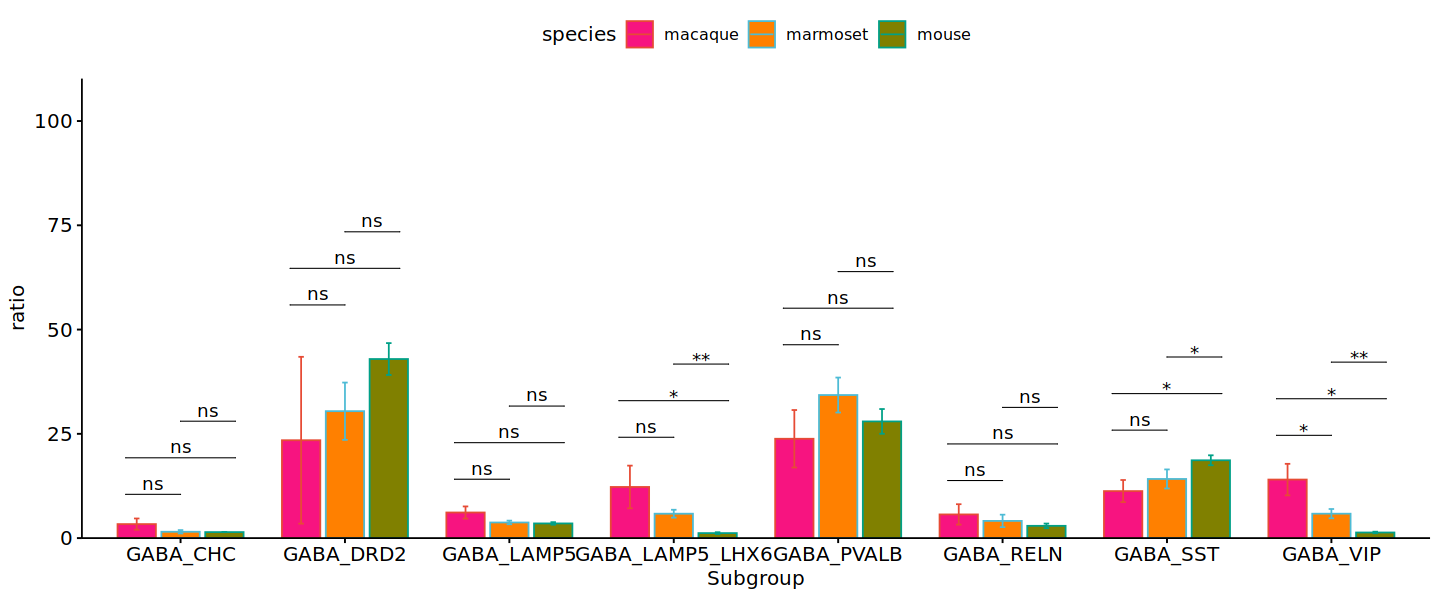

In [20]:
options(repr.plot.width=12, repr.plot.height=5)


test=ggbarplot(sum_all, x = "Subgroup", y = "ratio", 
          add = c("mean_sd"),
          color = "species",fill = "species", palette = "npg",
position = position_dodge(0.8))+  scale_fill_prism(palette = "candy_bright")#使用ggprism包修改颜色
test

stat.test <- sum_all %>% group_by(Subgroup) %>%
  t_test(ratio ~ species) %>%
  #adjust_pvalue()%>% 
  add_significance("p.adj")
stat.test <- stat.test %>% 
  add_xy_position(x='Subgroup',dodge = 1)
  #add_y_position()
gp3=test + stat_pvalue_manual(
  stat.test,  label = "p.adj.signif", tip.length = 0
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, .5)))

gp3


In [22]:
typeeee='GABA'
write.csv(sum_all,paste0('/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/species_compare_df/',typeeee,'_summary.csv'))


In [23]:
sum_all_sub=sum_all[sum_all$Subgroup=='GABA_RELN',]
sum_all_sub=rbind(sum_all_sub,sum_all_sub)
compare_means(ratio ~ species,data=sum_all_sub)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ratio,marmoset,mouse,0.32917303,0.450,0.329,ns,Wilcoxon
ratio,marmoset,macaque,0.22440071,0.450,0.224,ns,Wilcoxon
ratio,mouse,macaque,0.01117972,0.034,0.011,*,Wilcoxon


In [24]:
unique(sum_all$Subgroup)

[1] "GABA_CHC"        "GABA_DRD2"       "GABA_LAMP5"      "GABA_LAMP5_LHX6"
[5] "GABA_PVALB"      "GABA_RELN"       "GABA_SST"        "GABA_VIP"

In [25]:
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_RELN',]
with(sub_sum_all, shapiro.test(ratio[species=='marmoset']))
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_RELN',]
with(sub_sum_all, shapiro.test(ratio[species=='mouse']))
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_RELN',]
with(sub_sum_all, shapiro.test(ratio[species=='macaque']))

sub_sum_all=sum_all[sum_all$Subgroup=='GABA_CHC',]
with(sub_sum_all, shapiro.test(ratio[species=='marmoset']))
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_CHC',]
with(sub_sum_all, shapiro.test(ratio[species=='mouse']))
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_CHC',]
with(sub_sum_all, shapiro.test(ratio[species=='macaque']))

sub_sum_all=sum_all[sum_all$Subgroup=='GABA_DRD2',]
with(sub_sum_all, shapiro.test(ratio[species=='marmoset']))
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_DRD2',]
with(sub_sum_all, shapiro.test(ratio[species=='mouse']))
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_DRD2',]
with(sub_sum_all, shapiro.test(ratio[species=='macaque']))

sub_sum_all=sum_all[sum_all$Subgroup=='GABA_LAMP5',]
with(sub_sum_all, shapiro.test(ratio[species=='marmoset']))
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_LAMP5',]
with(sub_sum_all, shapiro.test(ratio[species=='mouse']))
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_LAMP5',]
with(sub_sum_all, shapiro.test(ratio[species=='macaque']))


sub_sum_all=sum_all[sum_all$Subgroup=='GABA_VIP',]
with(sub_sum_all, shapiro.test(ratio[species=='marmoset']))
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_VIP',]
with(sub_sum_all, shapiro.test(ratio[species=='mouse']))
sub_sum_all=sum_all[sum_all$Subgroup=='GABA_VIP',]
with(sub_sum_all, shapiro.test(ratio[species=='macaque']))


	Shapiro-Wilk normality test

data:  ratio[species == "marmoset"]
W = 0.95887, p-value = 0.7718



	Shapiro-Wilk normality test

data:  ratio[species == "mouse"]
W = 0.89598, p-value = 0.3728



	Shapiro-Wilk normality test

data:  ratio[species == "macaque"]
W = 0.91047, p-value = 0.4849



	Shapiro-Wilk normality test

data:  ratio[species == "marmoset"]
W = 0.90564, p-value = 0.4596



	Shapiro-Wilk normality test

data:  ratio[species == "mouse"]
W = 0.95283, p-value = 0.5819



	Shapiro-Wilk normality test

data:  ratio[species == "macaque"]
W = 0.8989, p-value = 0.4256



	Shapiro-Wilk normality test

data:  ratio[species == "marmoset"]
W = 0.9625, p-value = 0.7946



	Shapiro-Wilk normality test

data:  ratio[species == "mouse"]
W = 0.91501, p-value = 0.435



	Shapiro-Wilk normality test

data:  ratio[species == "macaque"]
W = 0.96543, p-value = 0.813



	Shapiro-Wilk normality test

data:  ratio[species == "marmoset"]
W = 0.94477, p-value = 0.6836



	Shapiro-Wilk normality test

data:  ratio[species == "mouse"]
W = 0.86219, p-value = 0.2736



	Shapiro-Wilk normality test

data:  ratio[species == "macaque"]
W = 0.79611, p-value = 0.09543



	Shapiro-Wilk normality test

data:  ratio[species == "marmoset"]
W = 0.95232, p-value = 0.7307



	Shapiro-Wilk normality test

data:  ratio[species == "mouse"]
W = 0.97754, p-value = 0.7127



	Shapiro-Wilk normality test

data:  ratio[species == "macaque"]
W = 0.90149, p-value = 0.4385


In [26]:
meta_mouse=mouse_meta[mouse_meta$Subgroup=='No-Neuron',]
meta_mouse$Subgroup=meta_mouse$SuperCluster

meta_macaque=macaque_meta[macaque_meta$Subgroup=='No-Neuron',]
meta_macaque$Subgroup=meta_macaque$SuperCluster

meta_marmoset= marmoset_meta[marmoset_meta$Subgroup=='No-Neuron',]
meta_marmoset$Subgroup=meta_marmoset$SuperCluster

unique(meta_mouse$Subgroup)
unique(meta_macaque$Subgroup)
unique(meta_marmoset$Subgroup)

[1] "OPC"        "Oligo"      "Endotheial" "Astrocytes" "Microglia"

[1] "Oligo"      "Astrocytes" "Microglia"  "OPC"        "Endotheial"

[1] "OPC"        "Astrocytes" "Endotheial" "Oligo"      "Microglia"

In [27]:
meta_mouse$num=1
mouse_sum=meta_mouse %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
mouse_sum$all=sum(mouse_sum$part_num)
mouse_sum$ratio=mouse_sum$part_num/mouse_sum$all*100

mouse_sum_all=data.frame()
for(i in unique(mouse_meta$sample)){
    meta_mouse_sub=meta_mouse[meta_mouse$sample %in% i,]
    meta_mouse_sub$num=1
    mouse_sum=meta_mouse_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    mouse_sum$all=sum(mouse_sum$part_num)
    mouse_sum$ratio=mouse_sum$part_num/mouse_sum$all*100
    mouse_sum$donor=paste0('mouse_',i)
    mouse_sum_all=rbind(mouse_sum_all,mouse_sum)
}


macaque_sum_all=data.frame()
for(i in unique(macaque_meta$sample)){
    meta_macaque_sub=meta_macaque[meta_macaque$sample %in% i,]
    meta_macaque_sub$num=1
    macaque_sum=meta_macaque_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    macaque_sum$all=sum(macaque_sum$part_num)
    macaque_sum$ratio=macaque_sum$part_num/macaque_sum$all*100
    macaque_sum$donor=paste0('macaque_',i)
    macaque_sum_all=rbind(macaque_sum_all,macaque_sum)
}

marmoset_sum_all=data.frame()
for(i in unique(marmoset_meta$sample)){
    meta_marmoset_sub=meta_marmoset[meta_marmoset$sample %in% i,]
    meta_marmoset_sub$num=1
    marmoset_sum=meta_marmoset_sub %>% group_by(Subgroup) %>% summarise(part_num=sum(num))
    marmoset_sum$all=sum(marmoset_sum$part_num)
    marmoset_sum$ratio=marmoset_sum$part_num/marmoset_sum$all*100
    marmoset_sum$donor=paste0('marmoset_',i)
    marmoset_sum_all=rbind(marmoset_sum_all,marmoset_sum)
}

marmoset_sum_all$species='marmoset'
mouse_sum_all$species='mouse'
macaque_sum_all$species='macaque'
sum_all=rbind(marmoset_sum_all,mouse_sum_all,macaque_sum_all)
sum_all

Subgroup,part_num,all,ratio,donor,species
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Astrocytes,892,2411,36.997097,marmoset_MT23R-001,marmoset
Endotheial,87,2411,3.608461,marmoset_MT23R-001,marmoset
Microglia,94,2411,3.898797,marmoset_MT23R-001,marmoset
Oligo,1268,2411,52.592285,marmoset_MT23R-001,marmoset
OPC,70,2411,2.903360,marmoset_MT23R-001,marmoset
Astrocytes,2258,4649,48.569585,marmoset_MT30-008,marmoset
Endotheial,104,4649,2.237040,marmoset_MT30-008,marmoset
Microglia,234,4649,5.033341,marmoset_MT30-008,marmoset
Oligo,1925,4649,41.406754,marmoset_MT30-008,marmoset


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



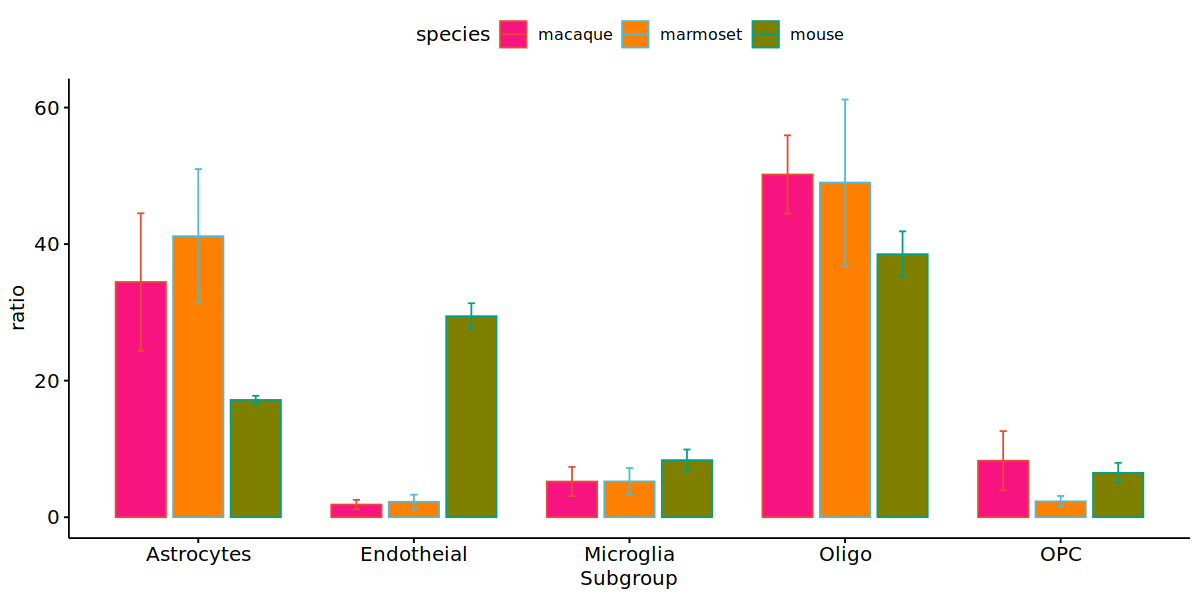

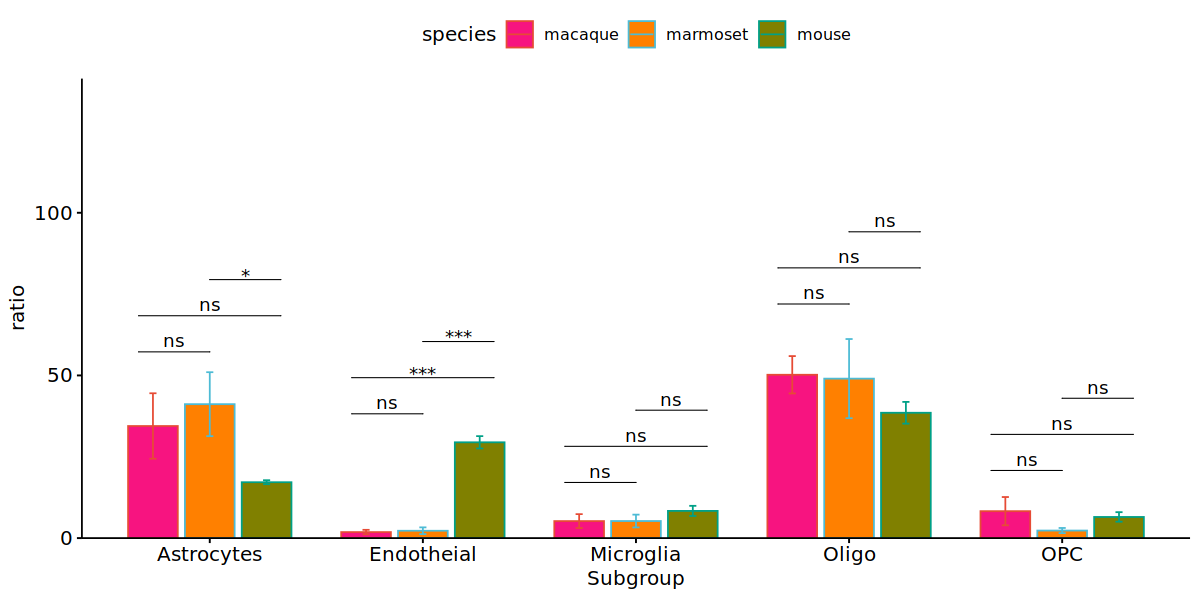

In [28]:
options(repr.plot.width=10, repr.plot.height=5)


test=ggbarplot(sum_all, x = "Subgroup", y = "ratio", 
          add = c("mean_sd"),
          color = "species",fill = "species", palette = "npg",
position = position_dodge(0.8))+  scale_fill_prism(palette = "candy_bright")#使用ggprism包修改颜色
test

stat.test <- sum_all %>% group_by(Subgroup) %>%
  t_test(ratio ~ species) %>%
  #adjust_pvalue()%>% 
  add_significance("p.adj")
stat.test <- stat.test %>% 
  add_xy_position(x='Subgroup',dodge = 1)
  #add_y_position()
gp4=test + stat_pvalue_manual(
  stat.test,  label = "p.adj.signif", tip.length = 0
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, .5)))


gp4

In [29]:
typeeee='NON'
write.csv(sum_all,paste0('/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/species_compare_df/',typeeee,'_summary.csv'))


In [60]:
pdf("/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/fig6_renew_240118/bili_all.pdf", width=6, height=5)
gp1
dev.off()

pdf("/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/fig6_renew_240118/bili_ex.pdf", width=6, height=5)
gp2
dev.off()

pdf("/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/fig6_renew_240118/bili_in.pdf", width=12, height=5)
gp3
dev.off()

pdf("/home/liuyx/liuyuxuan/spa_seurat/cla/fig_1206/fig6_renew_240118/bili_non.pdf", width=10, height=5)
gp4
dev.off()


png 
  2

png 
  2

png 
  2

png 
  2